#### Discussion Related with Outliers and Impact on Machine Learning

#### Which MAchine Learning models are sensitive to Outliers?

##### 1.Naive Bayes classifier ----- Not sensitive to outleirs
##### 2. SVM ------ ---------------- Not sensitive to outleirs
##### 3. Linear Regression --------- Sensitive to outliers
##### 4. Logistic Regression ------- Sensitive to outliers
##### 5. Decision Tree ------------- Not sensitive to outleirs
##### 6. Random Forest ------------- Not sensitive to outleirs
##### 7. K Nearest Neighbour(KNN) -- Not Sensitive to outliers
##### 8. K-means ------------------- Sensitive to outleirs
##### 9. Hierarical ---------------- Sensitive
##### 10. PCA ---------------------- Sensitive
##### 11. Neural Networks ---------- Sensitive

In [4]:
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv('C:/Users/user/DATA_SCIENCE/Feature_Engineering/Datasets/Titanic/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.Age.isnull().sum()

177

In [10]:
import seaborn as sns

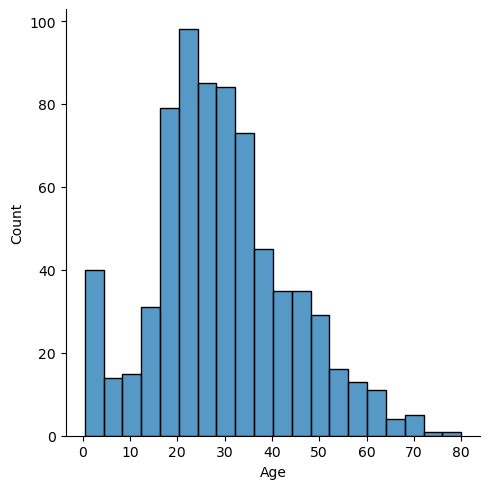

In [12]:
sns.displot(df['Age'].dropna())

In [14]:
# No outliers in the data when null is dropped

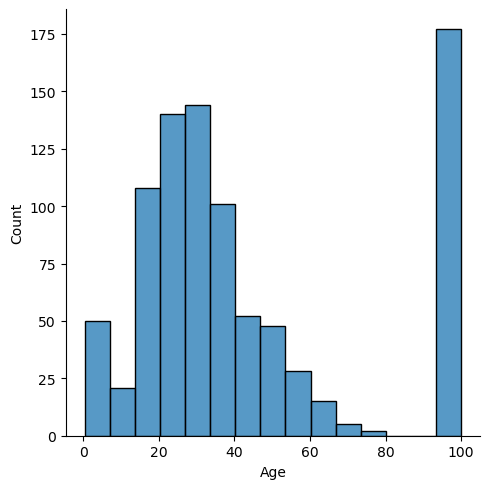

In [16]:
# Replace null values with an ambigous number eg 100

sns.displot(df['Age'].fillna(100))

In [ ]:
# we have created outliers in the data because we have introduced 100

#### Guassian Distribution

Text(0, 0.5, 'Number of passengers')

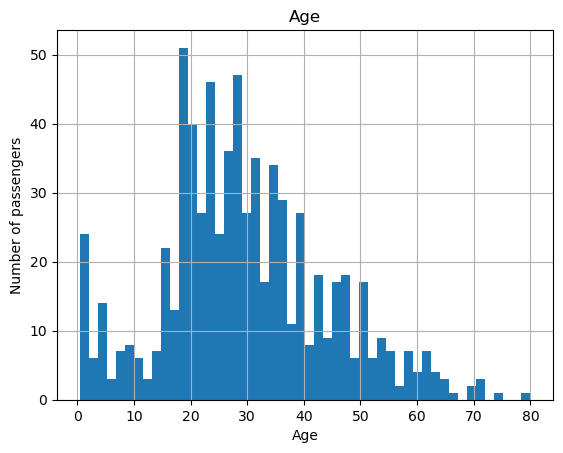

In [24]:
# Histogram

figure = df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('Number of passengers')

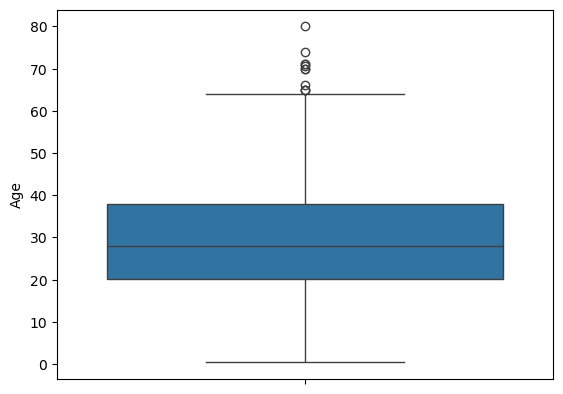

In [29]:
# In a guassian distributed data/normal distributed data, we use box plot to identify outliers

figure=sns.boxplot(df.Age) # the dotted ones are the outliers

In [33]:
# Assuming the features of age follows a guassian distribution, we will calculate the boundaries which differentiate the outliers

df.Age.mean()

29.69911764705882

#### If the data is normally distributed we use this

In [49]:
upper_boundary = df['Age'].mean() + 3 * df['Age'].std()
lower_boundary = df['Age'].mean() - 3 * df['Age'].std()
print('Upper Boundary is:', upper_boundary)
print('Lower Bpundary is:', lower_boundary)
print('Mean is:', df.Age.mean())

Upper Boundary is: 73.27860964406095
Lower Bpundary is: -13.88037434994331
Mean is: 29.69911764705882


### Use this technique when the features are skewed

In [53]:
# Computing the inter-Quartile range to calculate the boundary
IQR = df.Age.quantile(0.75) - df.Age.quantile(0.25)

In [55]:
IQR

17.875

In [88]:
# Apply this technique when the data is normally distributed

lower_bridge = df['Age'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['Age'].quantile(0.75)+(IQR*1.5)

In [61]:
print('Lower bridge is: ', lower_bridge)
print('Upper bridge is: ', upper_bridge)

Lower bridge is:  -6.6875
Upper bridge is:  64.8125


In [63]:
#with respect to extreme outliers multiply IQR by 3

lower_bridge = df['Age'].quantile(0.25)-(IQR*3)
upper_bridge = df['Age'].quantile(0.75)+(IQR*3)

In [65]:
print('Lower bridge is: ', lower_bridge)
print('Upper bridge is: ', upper_bridge)

Lower bridge is:  -33.5
Upper bridge is:  91.625


### Skewed features

Text(0, 0.5, 'Number of passengers')

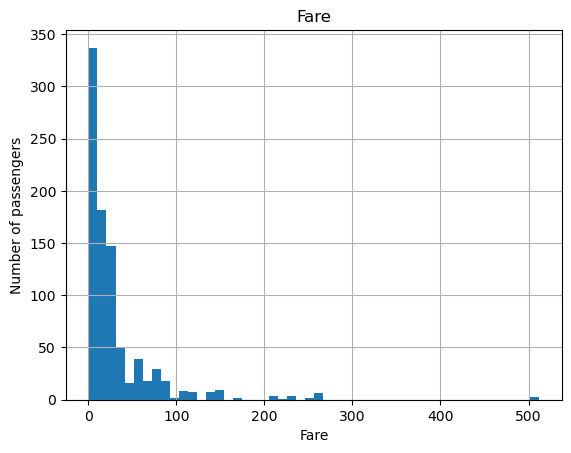

In [72]:
# Performing the calculation for column fare where the feature is skewed
# Histogram

figure = df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('Number of passengers')

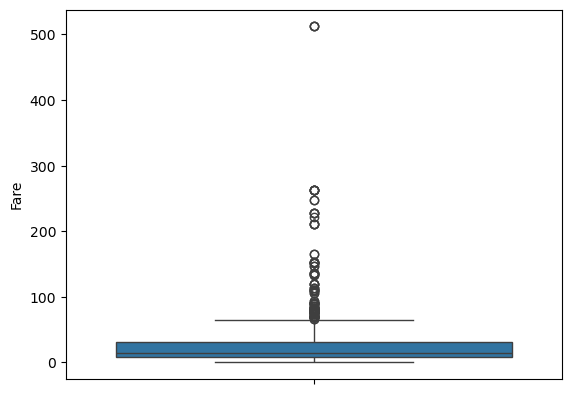

In [74]:
figure=sns.boxplot(df.Fare) # Huge amount of outliers

In [76]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [78]:
#Performing the IQR

IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)

In [80]:
lower_bridge = df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge = df['Fare'].quantile(0.75)+(IQR*1.5)

In [82]:
print('Lower bridge is: ', lower_bridge)
print('Upper bridge is: ', upper_bridge)

Lower bridge is:  -26.724
Upper bridge is:  65.6344


In [90]:
# Apply this technique when the data is skewed, both righ and left

lower_bridge = df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge = df['Fare'].quantile(0.75)+(IQR*3)

In [86]:
print('Lower bridge is: ', lower_bridge)
print('Upper bridge is: ', upper_bridge)

Lower bridge is:  -61.358399999999996
Upper bridge is:  100.2688


In [98]:
data=df.copy()

#### Since age is normally distributed, to deal with the outliers, using the above technique, 
#### whenever the age value is equals 73 or greater, we replace it with 73

In [115]:
data.loc[data['Age']>=73,'Age']=73

Text(0, 0.5, 'Number of passengers')

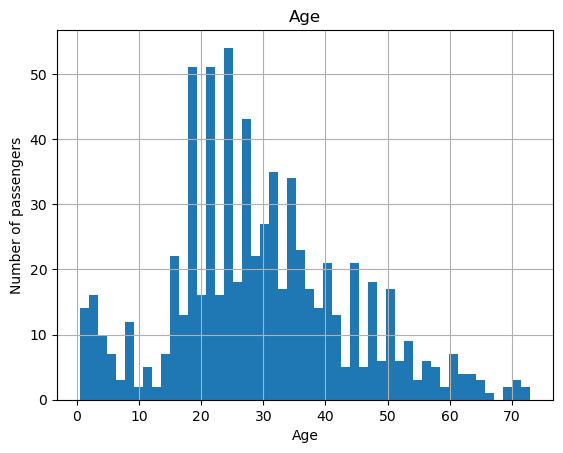

In [128]:
figure = data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('Number of passengers')

#### Since Fare is skewed, to deal with the outliers, using the above technique, 
#### whenever the fare value is equals 100 or greater, we replace it with 100

In [120]:
data.loc[data['Fare']>=100, 'Fare']=100

Text(0, 0.5, 'Number of passengers')

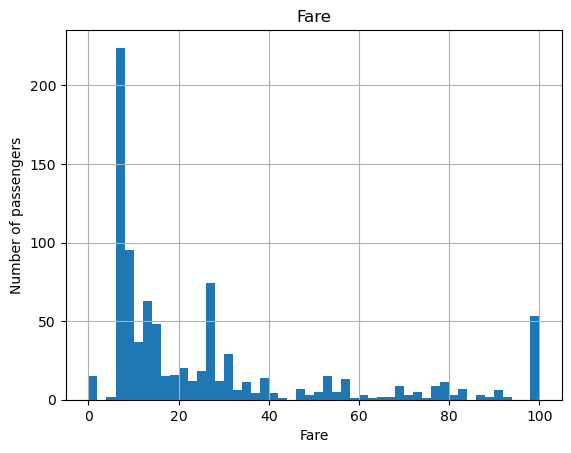

In [126]:
figure = data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('Number of passengers')

In [131]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [147]:
### Logistic regression

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print('Accuracy Score {}'.format(accuracy_score(y_test,y_pred)))
print('Roc Score {}'.format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy Score 0.6716417910447762
Roc Score 0.6704760217339947


In [149]:
#RandomForesr

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print('Accuracy Score {}'.format(accuracy_score(y_test,y_pred)))
print('Roc Score {}'.format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy Score 0.6529850746268657
Roc Score 0.7003602645877629
